
# Проверка гипотез с помощью python.

## Задание

* Выполнить проверку предложенной гипотезы
* Выполнить проверку статистической гипотезы для проверки нормальности числовых признаков
* Проверка мультиколлинеарности
* Все статистические тесты должны быть выполнены с 95%-м уровнем достоверности (т.е. значение р < 0,05)

## Датасет

Как данные представлены заказчиком:

<table>
<thead><tr>
<th><strong>Feature Name</strong></th>
<th><strong>Description</strong></th>
<th><strong>Data Type</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>customerID</td>
<td>Содержит идентификатор клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>gender</td>
<td>Пол клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>SeniorCitizen</td>
<td>Является ли клиент пожилым гражданином</td>
<td>numeric, int</td>
</tr>
<tr>
<td>Partner</td>
<td>Есть ли у клиента партнер</td>
<td>categorical</td>
</tr>
<tr>
<td>Dependents</td>
<td>Является ли клиент кормильцем</td>
<td>categorical</td>
</tr>
<tr>
<td>tenure</td>
<td>Количество месяцев, в течение которых клиент оставался в компании</td>
<td>numeric, int</td>
</tr>
<tr>
<td>PhoneService</td>
<td>Есть ли у клиента телефонная связь</td>
<td>categorical</td>
</tr>
<tr>
<td>MultipleLines</td>
<td>Есть ли у клиента несколько линий</td>
<td>categorical</td>
</tr>
<tr>
<td>InternetService</td>
<td>Интернет-провайдер клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineSecurity</td>
<td>Есть ли у клиента онлайн-безопасность</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineBackup</td>
<td>Есть ли у клиента онлайн-резервное копирование</td>
<td>categorical</td>
</tr>
<tr>
<td>DeviceProtection</td>
<td>Имеет ли клиент защиту устройства</td>
<td>categorical</td>
</tr>
<tr>
<td>TechSupport</td>
<td>Есть ли у клиента техническая поддержка</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingTV</td>
<td>Есть ли у клиента потоковое телевидение</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingMovies</td>
<td>Есть ли у клиента стриминговые сервисы</td>
<td>categorical</td>
</tr>
<tr>
<td>Contract</td>
<td>Срок действия контракта заказчика</td>
<td>categorical</td>
</tr>
<tr>
<td>PaperlessBilling</td>
<td>Имеет ли клиент безналичные счета</td>
<td>categorical</td>
</tr>
<tr>
<td>PaymentMethod</td>
<td>Способ оплаты клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>MonthlyCharges</td>
<td>Сумма, взимаемая с клиента ежемесячно </td>
<td> numeric , int</td>
</tr>
<tr>
<td>TotalCharges</td>
<td>Общая сумма, списанная с клиента</td>
<td>object</td>
</tr>
<tr>
<td>Churn</td>
<td>Ушел ли клиент</td>
<td>categorical</td>
</tr>
</tbody>
</table>

Описание от заказчика:

Каждая строка представляет клиента, каждый столбец содержит атрибуты клиента.

Набор данных включает информацию :

- Клиенты, которые ушли в течение последнего месяца — колонка называется `Churn`
- Услуги, на которые подписался каждый клиент — телефон, несколько линий, интернет, онлайн-безопасность, резервное копирование, защита устройств, техническая поддержка, потоковое ТВ и фильмы.
- Информация о счетах клиентов — как долго они являются клиентами, контракт, способ оплаты, безналичные счета, ежемесячные платежи и общая сумма платежей.
- Демографическая информация о клиентах — пол, возраст, наличие партнеров и иждивенцев.

## 1. Импорт Библиотек 

Импортируйте необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # отобразить все колонки

from scipy import stats

## Данные

In [2]:
df = pd.read_csv("./Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Описательный анализ данных

Рассмотрите данные — изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [3]:
# ваше решение
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>, <Axes: >]],
      dtype=object)

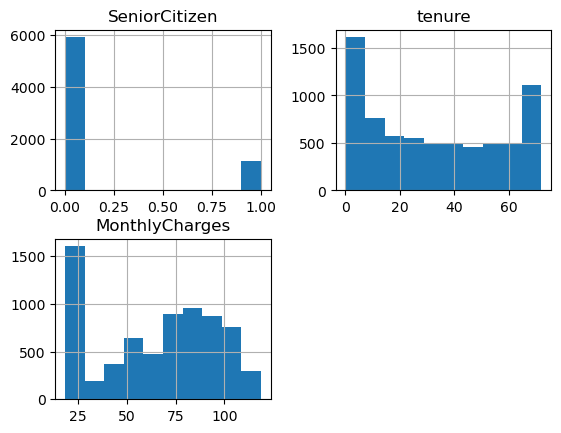

In [5]:
df.hist()

In [6]:
df.mean(numeric_only=True)

SeniorCitizen      0.162147
tenure            32.371149
MonthlyCharges    64.761692
dtype: float64

In [7]:
df.median(numeric_only=True)

SeniorCitizen      0.00
tenure            29.00
MonthlyCharges    70.35
dtype: float64

In [8]:
df.mode(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,20.05


In [9]:
df.var(numeric_only=True)

SeniorCitizen       0.135875
tenure            603.168108
MonthlyCharges    905.410934
dtype: float64

In [10]:
df.std(numeric_only=True)

SeniorCitizen      0.368612
tenure            24.559481
MonthlyCharges    30.090047
dtype: float64

<Axes: >

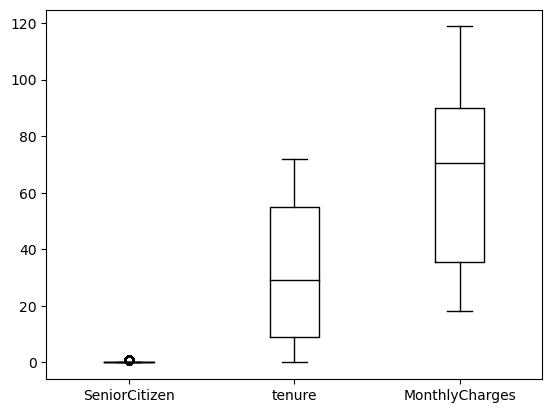

In [11]:
df.boxplot(column=['SeniorCitizen', 'tenure', 'MonthlyCharges'], grid= False , color='black')

**Вывод:** Все что я хотел сказать, я уже сказал. Авторы курса, он хорош), спору нет, но прошу, меньше копировать-вставить:)
Либо делаете другие задания, либо пусть будет повтор с другим датасетом, чтобы можно было сказать что-то новое о данных(это пожелание) 

### Уникальные значения для всех столбцов

Рассмотрите уникальные значения категориальных признаков. 

Сделайте вывод.

**Подсказка:** можете воспользоваться методом `describe(include='object')`

In [12]:
# ваше решение
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


<Axes: xlabel='Partner,OnlineSecurity'>

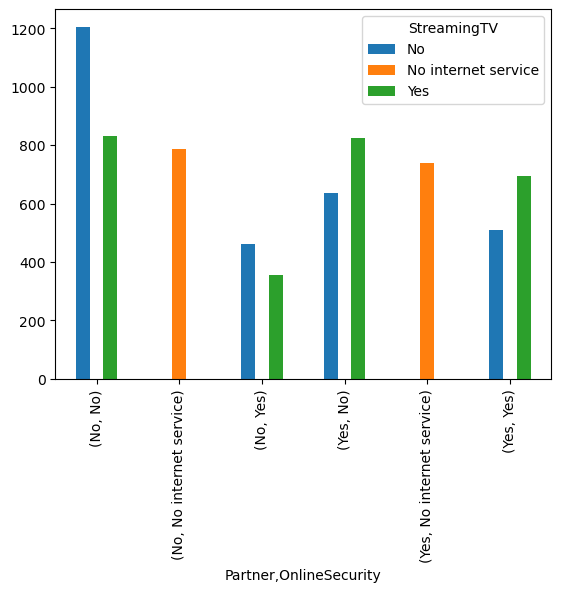

In [13]:
ct = pd.crosstab([df.Partner, df.OnlineSecurity], df.StreamingTV)
ct.plot(kind='bar')

**Вывод:** Поторяться не стану

## 3. Предобработка данных

### Дубликаты

Предобработайте датасет — проверьте на наличие дубликатов и удалите, если они есть.

In [14]:
# ваше решение
print(len(df)- len(df.drop_duplicates()))
df.drop_duplicates(inplace=True)

0


### Отсутствующие значения

Пояснение к данному датасету:

Не всегда в данных есть явные пропуски, которые легко индексируются средствами Pandas. К сожалению бывают проблемы с выгрузками данных, некачественными источниками, или когда данные записываются вручную — часто присутствует человеческий фактор. По мере работы с новыми данными лучше проверять на наличие таких данных, иначе из-за этого исследование может исказиться.

Рассмотрим такой случай:

In [15]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Да, не видно пропусков. Но почему тогда столбец `TotalCharges` не отобразился изначально как числовой столбец?

Проверим все столбцы:

In [16]:
for col in df:
    if df[col].dtype == 'object':
        nans = df[col].apply(lambda x: len(x.strip())==0).sum()
        if nans > 0:
            print(f'Неявные пропуски столбца {col}:', df[col].apply(lambda x: len(x.strip())==0).sum())

Неявные пропуски столбца TotalCharges: 11


Что мы можем сделать в таком случае?

1) По этому же фильтру удалить строки с пропусками, чтобы не искажать данные
2) Перевести тип столбца на числовой с параметром `errors = 'coerce'` и удалить

Но можно не удалять, чтобы не потерять данные, а:

1) Заменить значения на другое
2) Поменять на другое — но только в том случае, если есть какая-то зависимость в данных.

Давайте изменим тип и найдем зависимость:

In [17]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Но как выглядят наши данные обычно?**

In [18]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4405,8417-FMLZI,Male,0,Yes,Yes,6,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),83.55,477.55,Yes
2873,0148-DCDOS,Male,0,No,No,25,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),94.70,2362.10,Yes
262,7529-ZDFXI,Male,1,Yes,No,57,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,89.85,4925.35,No
4122,4632-XJMEX,Male,0,No,Yes,53,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,No,Credit card (automatic),62.85,3419.50,No
138,6217-KDYWC,Male,0,No,Yes,57,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.60,1170.55,No


**Ничего не заметили?**

Может общая сумма, списанная с клиента, равна сумме, взимаемой с клиента ежемесячно умноженной на количество времени?

Давайте посмотрим.

In [19]:
df[(df['TotalCharges'] / df['MonthlyCharges']) == df['tenure']].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No


Нашей гипотезе есть место быть.

Значит `TotalCharges` = `MonthlyCharges` * время. В данном датасете указано только количество месяцев, без точного времени, поэтому будет грубо просто перемножить один столбец на другой. Но пропуски мы уже можем заменить на `0`, так как в тех строках `tenure` == 0.

Заменим пропуски на нужное нам число.

In [20]:
df['TotalCharges'].fillna(0, inplace=True)

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

In [21]:
# ваше решение
df.TotalCharges = df.TotalCharges.astype(float)

**Вывод:** Свиснул... Ой, то есть перевел)

# 4. Проверка гипотез

Задание: сравнить две выборки — `Churn='No'` и `Churn='Yes'` 

Гипотеза — среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками.

In [22]:
# ваше решение
ch_y = df[df['Churn'] == 'Yes']
ch_n = df[df['Churn'] == 'No']

alpha = .05

t_stat, pvalue = stats.ttest_ind(ch_y['tenure'], ch_n['tenure'])

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


**Вывод:** среднее количество месяцев, в течение которых клиент оставался в компании, действительно отличается между двумя выборками(НАВЕРНОЕ :/ )

## 5. Статистический анализ на норму

Задание: выберите числовые признаки и проведите анализ — соответствуют ли распределения нормальному?

In [23]:
# ваше решение
_, pvalue = stats.normaltest(df.SeniorCitizen) # применим К'2-тест Д'Агостино для SeniorCitizen

alpha = .05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


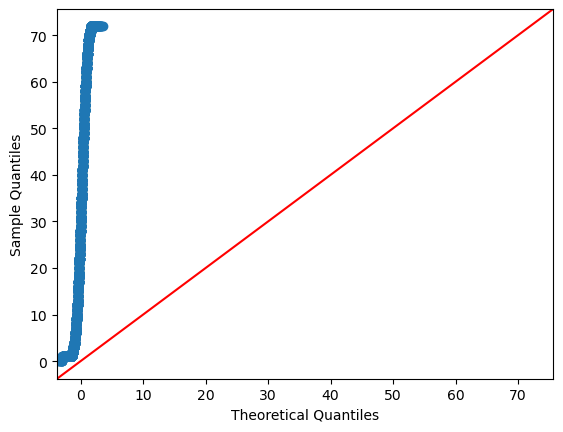

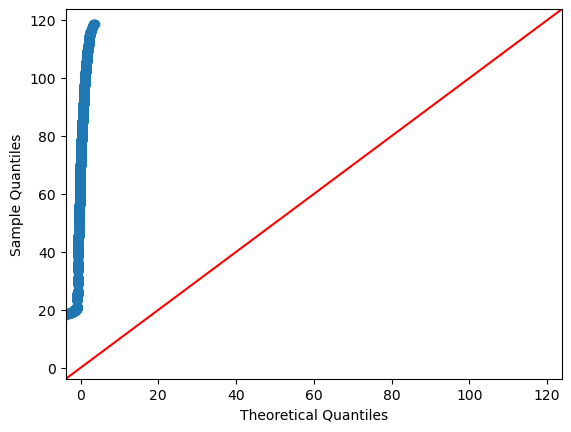

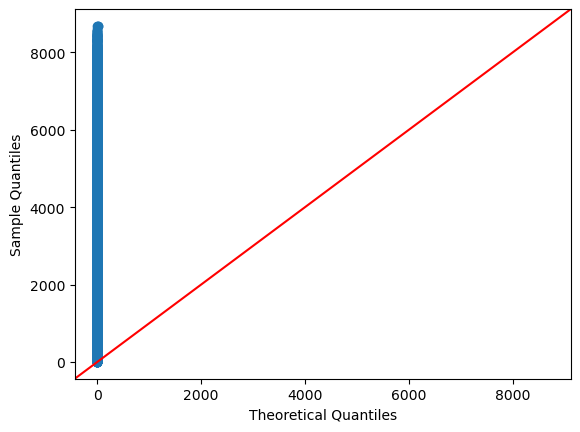

In [24]:
# Попробую разнообразить и посмотреть распелдление более интересным способом (QQplot)
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig1 = sm.qqplot(df.tenure, line='45')
fig2 = sm.qqplot(df.MonthlyCharges, line='45')
fig2 = sm.qqplot(df.TotalCharges, line='45')
plt.show()

**Вывод:** Где то я это уже видел...

## 6. ЗАДАЧИ PRO

Мы провели базовый анализ выше и сделали выводы.

Но требование заказчика — выяснить причину ухода клиента.

Ваша задача — провести полный анализ с помощью статистических гипотез взаимосвязи всех признаков с нашим таргетом `Churn` (целевым признаком). 

**Этапы:**

1.	Предобработка данных — измените датасет в части: категориальные признаки надо перевести в числовые представления. Главное —понимать взаимосвязь: бинарный признак, порядковый, просто категории или что-то иное.
2.	Выберите нужные гипотезы, основываясь на типах признаков.
3.	Проведите анализ и выясните, почему клиент уходит, с чем коррелирует Churn, может это зависит от пола клиента? Или есть иные обстоятельства?
4.	После проверки гипотез постройте тепловую карту корреляции Phik и сделайте дополнительный вывод.
5.	Дополните общий вывод.


**Примечание:** задание не ограничено только этими этапами. Можно их дополнить — может стоит сделать фильтр данных, рассмотреть данные под другим углом и провести дополнительную аналитику? Средствами и методами не ограничены.

Для начала нужно перевести все качественные переменные в количественные...

In [25]:
for col in df:
    df[col] = pd.factorize(df[col])[0]
    
# gender: 0-Female 1-Male
# Остальные: 1-Yes 0-No, Parther, PhoneService и тд, везде, где ДА и НЕТ

Разбираем значения на две выборки: Те кто ушел и кто не ушел

In [26]:
ch_y = df[df['Churn'] == 1] # ушли
ch_n = df[df['Churn'] == 0] # не ушли

На основе наших данных сформулируем несколько гипотиз, обабщенно, мы назовем их так:
1. Женьщины используют интернет сервисы больше
2. Клиент - пожилой человек
3. Наличие пары влияет на испотзование услуг
4. Клиент - кормит смемью
5. Клиент слишком долго нашим клиентом и ему это надоело
6. Клиент имеет телефонную связь
7. Клиент имеет несколько линий связи

Для проверки гипотиз будем применять scipy.stats.ttest_ind(), тк выборки 
ch_y и ch_n не являются зависимыми, так это части одной выборки разбитых на ту где клиент ушел, а где нет

- H0 - нулевая гипотиза(самый худший вариант из возможных)
- H1 - первичная гипотиза(альтернатива нулевой)

# Проверка гипотизы 1: Женьщины используют интернет сервисы больше

- H0: Кол-ство женщин, отказавшийся от услуг равно кол-ству мужчин, отказавшийся от услуг.
- H1: Кол-ство женщин, отказавшийся от услуг не равно кол-ству мужчин, отказавшийся от услуг.

In [27]:
ch_n['gender'].value_counts()

1    2625
0    2549
Name: gender, dtype: int64

In [28]:
ch_y['gender'].value_counts()

0    939
1    930
Name: gender, dtype: int64

In [29]:
alpha = .05

t_stat, pvalue = stats.ttest_ind(ch_n['gender'], ch_y['gender'])

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.46990. Подтверждается нулевая гипотеза


**Вывод**: Нет смысла смотреть акцентировать внимание поле уходящего клиента, так примерно количество оставшихся или покинувших компанию примерно одинаково.

# Проверка гипотизы 2: Клиент - пожилой человек

- H0: Кол-ство пожилых, отказавшийся от услуг равно кол-ству не пожилых, отказавшийся от услуг.
- H1: Кол-ство пожилых, отказавшийся от услуг не равно кол-ству не пожилых, отказавшийся от услуг.

In [30]:
ch_n['SeniorCitizen'].value_counts()

0    4508
1     666
Name: SeniorCitizen, dtype: int64

In [31]:
ch_y['SeniorCitizen'].value_counts()

0    1393
1     476
Name: SeniorCitizen, dtype: int64

In [32]:
alpha = .05

t_stat, pvalue = stats.ttest_ind(ch_n['SeniorCitizen'], ch_y['SeniorCitizen'])

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


**Вывод**: берем во внимание H1 + факт, что больше людей уходит, чем остается, и большая часть уходит именно не пожилого возраста.
Первая зацепка: большинство уходящий - "молодеж"

# Проверка гипотизы 3: Наличие пары влияет на использование услуг

- H0: Кол-ство людей с парой, отказавшийся от услуг равно кол-ству людей без пары, отказавшийся от услуг.
- H1: Кол-ство людей с парой, отказавшийся от услуг не равно кол-ству людей без пары, отказавшийся от услуг.

In [33]:
ch_n['Partner'].value_counts()

0    2733
1    2441
Name: Partner, dtype: int64

In [34]:
ch_y['Partner'].value_counts()

1    1200
0     669
Name: Partner, dtype: int64

In [35]:
alpha = .05

t_stat, pvalue = stats.ttest_ind(ch_n['Partner'], ch_y['Partner'])

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


Большая часть людей уходящих без пары. "Возьмем на карандаш"

# Проверка гипотизы 4: Клиент - кормит смемью
- H0: Кол-ство кормильцев, отказавшийся от услуг равно кол-ству свободных, отказавшийся от услуг.
- H1: Кол-ство кормильцев, отказавшийся от услуг не равно кол-ству свободных, отказавшийся от услуг.

In [36]:
ch_n['Dependents'].value_counts()

0    3390
1    1784
Name: Dependents, dtype: int64

In [37]:
ch_y['Dependents'].value_counts()

0    1543
1     326
Name: Dependents, dtype: int64

In [38]:
alpha = .05

t_stat, pvalue = stats.ttest_ind(ch_n['Dependents'], ch_y['Dependents'])

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


**Вывод**: и тут и там большиство не кормильцы. 
Вторая зацепка: большинство уходящих, одинокие люди...

# Проверка гипотизы 5: Клиент слишком долго ,был нашим клиентом и ему это надоело
- H0: Срок контракта с компанией не влияет на факт ухода
- H1: Срок контракта с компанией влияет на факт ухода

In [39]:
pvalue = df['tenure'].corr(df['Churn'])

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:-0.14435. Нулевая гипотеза отвергается


Количество месяцев у ушедших в среднем больше, значит больше уходят, те, кто в
компании долгое время

In [40]:
ch_n['tenure'].mean()

32.372825666795514

In [41]:
ch_y['tenure'].mean()

25.39325842696629

Количество месяцев у ушедших в среднем больше, значит больше уходят, те, кто в
компании долгое время

# Проверка гипотизы 6: Клиент имеет телефонную связь
- H0: Кол-ство людей, отказавшийся от услуг, обладающих телефонной связью равно кол-ству без связи, отказавшийся от услуг.
- H1: Кол-ство людей, отказавшийся от услуг, обладающих телефонной связью не равно кол-ству без связи, отказавшийся от услуг.

In [42]:
ch_n['PhoneService'].value_counts()

1    4662
0     512
Name: PhoneService, dtype: int64

In [43]:
ch_y['PhoneService'].value_counts()

1    1699
0     170
Name: PhoneService, dtype: int64

In [44]:
alpha = .05

t_stat, pvalue = stats.ttest_ind(ch_n['PhoneService'], ch_y['PhoneService'])

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.31631. Подтверждается нулевая гипотеза


Значит это роли не играет

# Проверка гипотизы 7: Клиент имеет несколько линий связи
- H0: Кол-ство людей, отказавшийся от услуг, обладающих несколькими линиями связи равно кол-ству без линий связи, отказавшийся от услуг.
- H1: Кол-ство людей, отказавшийся от услуг, обладающих несколькими линиями связи не равно кол-ству без линий связи, отказавшийся от услуг.

In [45]:
ch_n['MultipleLines'].value_counts()

1    2541
2    2121
0     512
Name: MultipleLines, dtype: int64

In [46]:
ch_y['MultipleLines'].value_counts()

2    850
1    849
0    170
Name: MultipleLines, dtype: int64

In [47]:
df['MultipleLines']

0       0
1       1
2       1
3       0
4       1
       ..
7038    2
7039    2
7040    0
7041    2
7042    1
Name: MultipleLines, Length: 7043, dtype: int64

In [48]:
alpha = .05

t_stat, pvalue = stats.ttest_ind(ch_n['MultipleLines'], ch_y['MultipleLines'])

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00231. Нулевая гипотеза отвергается


# Общий вывод: Большинство уходящий являются молодые люди на основе отстутствия связи

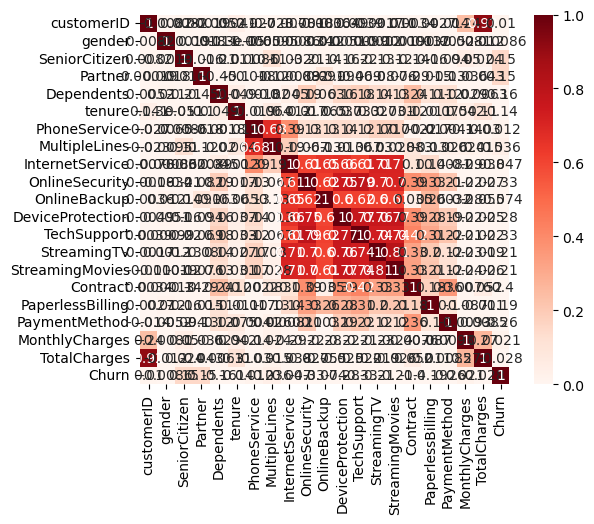

In [49]:
import seaborn as sns


corrs = df.dropna().corr()
sns.heatmap(corrs,
            cmap='Reds',
            square=True,
            vmin=0, 
            annot=True);

Опишите данные и результат исследования, основываясь на предыдущих шагах: